In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size = 1500)
lngs = np.random.uniform(low=-180.00, high=180.000, size =1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [4]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0],coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

hollister us
ushuaia ar
ulaanbaatar mn
castro cl
new norfolk au
kapaa us
east london za
cidreira br
atambua id
mataura pf
falealupo ws
chuy uy
tsihombe mg
verkhoyansk ru
rikitea pf
mujiayingzi cn
hilo us
busselton au
butaritari ki
qaanaaq gl
grand river south east mu
ushuaia ar
andenes no
muros es
mukhen ru
amderma ru
barrow us
albany au
vaini to
port alfred za
avarua ck
hilo us
jamestown sh
airai pw
kapaa us
hobart au
baghdad iq
tuktoyaktuk ca
hermanus za
bluff nz
eustis us
bluff nz
taolanaro mg
esperance au
pevek ru
dikson ru
taolanaro mg
alexandria eg
derzhavinsk kz
ushuaia ar
nikolskoye ru
hilo us
vao nc
torbay ca
mittagong au
saint anthony ca
amderma ru
khatanga ru
puerto ayora ec
bubaque gw
ponta do sol cv
rikitea pf
namibe ao
new norfolk au
tempio pausania it
ushuaia ar
hermanus za
fortuna us
porto novo cv
kruisfontein za
urusha ru
albany au
antalaha mg
hithadhoo mv
coffs harbour au
nelson bay au
illoqqortoormiut gl
busselton au
busselton au
hermanus za
isangel vu
ushuaia ar
lud

cabo san lucas mx
punta arenas cl
tocantinopolis br
caravelas br
butaritari ki
nizhneyansk ru
albany au
bluff nz
ushuaia ar
ushuaia ar
attawapiskat ca
cape town za
mount isa au
albany au
budisov nad budisovkou cz
norman wells ca
rikitea pf
bonavista ca
mataura pf
bluff nz
kosonsoy uz
yellowknife ca
axim gh
taolanaro mg
anloga gh
vaitupu wf
gat ly
cape town za
kodiak us
kapaa us
nantucket us
yangambi cd
busselton au
poum nc
east london za
punta arenas cl
san simon de la laguna mx
chabahar ir
vestmannaeyjar is
bur gabo so
egvekinot ru
vila vu
opuwo na
tiksi ru
aklavik ca
bambous virieux mu
hermanus za
cidreira br
wilmington us
jamestown sh
chokurdakh ru
east london za
rikitea pf
lianzhou cn
kapaa us
ucluelet ca
jawhar so
kaeo nz
salalah om
provideniya ru
new norfolk au
waipawa nz
hualmay pe
nioro ml
yellowknife ca
springbok za
port alfred za
sanandaj ir
norman wells ca
tessalit ml
neiafu to
teofilo otoni br
lata sb
warqla dz
san cristobal ec
birjand ir
avarua ck
lorengau pg
chuy uy
padan

In [8]:
# Practice citipy
county = citipy.nearest_city(coordinate[0],coordinate[1])
county

In [9]:
# Practice citipy
name = county.city_name
name

'taolanaro'

In [10]:
# Practice citipy
country = county.country_code
country

'mg'

In [11]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
    
# Print the city count to confirm sufficient count.
len(cities)

629

In [12]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [13]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=26dbb3acb6acb436cc3b2b68d480b32c


In [14]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [15]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


Beginning Data Retrieval     
-----------------------------


In [ ]:
# Loop through all the cities in our list.
for i in range(len(cities)):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [ ]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1


In [ ]:
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

In [16]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hollister
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | ulaanbaatar
Processing Record 4 of Set 1 | castro
Processing Record 5 of Set 1 | new norfolk
Processing Record 6 of Set 1 | kapaa
Processing Record 7 of Set 1 | east london
Processing Record 8 of Set 1 | cidreira
Processing Record 9 of Set 1 | atambua
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | falealupo
City not found. Skipping...
Processing Record 12 of Set 1 | chuy
Processing Record 13 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 14 of Set 1 | verkhoyansk
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | mujiayingzi
Processing Record 17 of Set 1 | hilo
Processing Record 18 of Set 1 | busselton
Processing Record 19 of Set 1 | butaritari
Processing Record 20 of Set 1 | qaanaaq
Processing Record 21 of Set 1 | grand river south east
City not found. 

City not found. Skipping...
Processing Record 33 of Set 4 | kalmunai
Processing Record 34 of Set 4 | trojes
Processing Record 35 of Set 4 | saint george
Processing Record 36 of Set 4 | chimbote
Processing Record 37 of Set 4 | beringovskiy
Processing Record 38 of Set 4 | lolua
City not found. Skipping...
Processing Record 39 of Set 4 | porto belo
Processing Record 40 of Set 4 | ngukurr
City not found. Skipping...
Processing Record 41 of Set 4 | valparaiso
Processing Record 42 of Set 4 | oussouye
Processing Record 43 of Set 4 | dubno
Processing Record 44 of Set 4 | portland
Processing Record 45 of Set 4 | te anau
Processing Record 46 of Set 4 | rio gallegos
Processing Record 47 of Set 4 | alta floresta
Processing Record 48 of Set 4 | rushden
Processing Record 49 of Set 4 | haines junction
Processing Record 50 of Set 4 | aklavik
Processing Record 1 of Set 5 | vaitupu
City not found. Skipping...
Processing Record 2 of Set 5 | taltal
Processing Record 3 of Set 5 | kungurtug
Processing Recor

Processing Record 24 of Set 8 | inongo
Processing Record 25 of Set 8 | numan
Processing Record 26 of Set 8 | sitka
Processing Record 27 of Set 8 | tocantinopolis
City not found. Skipping...
Processing Record 28 of Set 8 | nizhneyansk
City not found. Skipping...
Processing Record 29 of Set 8 | budisov nad budisovkou
Processing Record 30 of Set 8 | bonavista
Processing Record 31 of Set 8 | kosonsoy
Processing Record 32 of Set 8 | axim
Processing Record 33 of Set 8 | anloga
Processing Record 34 of Set 8 | nantucket
Processing Record 35 of Set 8 | yangambi
Processing Record 36 of Set 8 | san simon de la laguna
Processing Record 37 of Set 8 | chabahar
Processing Record 38 of Set 8 | vestmannaeyjar
Processing Record 39 of Set 8 | bur gabo
City not found. Skipping...
Processing Record 40 of Set 8 | vila
Processing Record 41 of Set 8 | opuwo
Processing Record 42 of Set 8 | bambous virieux
Processing Record 43 of Set 8 | wilmington
Processing Record 44 of Set 8 | lianzhou
Processing Record 45 o

Processing Record 11 of Set 12 | sosnovka
Processing Record 12 of Set 12 | medicine hat
Processing Record 13 of Set 12 | jining
Processing Record 14 of Set 12 | yar-sale
Processing Record 15 of Set 12 | ellensburg
Processing Record 16 of Set 12 | svetlogorsk
Processing Record 17 of Set 12 | tazovskiy
Processing Record 18 of Set 12 | maraa
Processing Record 19 of Set 12 | lao cai
Processing Record 20 of Set 12 | samusu
City not found. Skipping...
Processing Record 21 of Set 12 | poronaysk
Processing Record 22 of Set 12 | qui nhon
Processing Record 23 of Set 12 | gao
Processing Record 24 of Set 12 | mekhe
Processing Record 25 of Set 12 | tromso
Processing Record 26 of Set 12 | pitimbu
Processing Record 27 of Set 12 | pilot butte
Processing Record 28 of Set 12 | uwayl
City not found. Skipping...
Processing Record 29 of Set 12 | colares
Processing Record 30 of Set 12 | gizo
Processing Record 31 of Set 12 | santiago del estero
Processing Record 32 of Set 12 | yirol
City not found. Skipping.

In [17]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hollister,36.8525,-121.4016,63.00,58,0,0.00,US,2022-01-31 20:57:21
1,Ushuaia,-54.8000,-68.3000,53.22,66,40,23.02,AR,2022-01-31 20:47:41
2,Ulaanbaatar,47.9077,106.8832,-25.47,75,0,0.00,MN,2022-01-31 20:55:16
3,Castro,-24.7911,-50.0119,74.95,72,13,2.82,BR,2022-01-31 20:48:21
4,New Norfolk,-42.7826,147.0587,69.75,75,16,3.04,AU,2022-01-31 20:55:07
5,Kapaa,22.0752,-159.3190,77.47,70,0,1.01,US,2022-01-31 20:50:09
6,East London,-33.0153,27.9116,77.07,81,100,2.64,ZA,2022-01-31 20:52:37
7,Cidreira,-30.1811,-50.2056,77.32,73,46,7.65,BR,2022-01-31 20:58:41
8,Atambua,-9.1061,124.8925,73.98,86,97,10.27,ID,2022-01-31 20:54:01
9,Mataura,-46.1927,168.8643,67.48,67,38,1.81,NZ,2022-01-31 20:52:37


In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [20]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

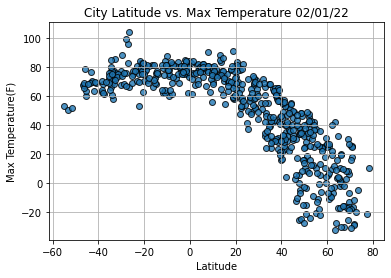

In [30]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats, max_temps,edgecolors="black", linewidths=1, marker="o",alpha=0.8,label = "Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature(F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

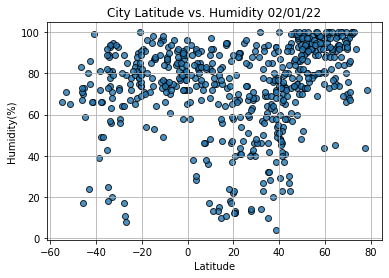

In [31]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "  + time.strftime("%x"))
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

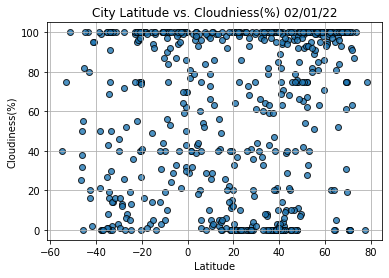

In [32]:
# Build the scatter plots for latitude vs. Cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudniess(%) "  + time.strftime("%x"))
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

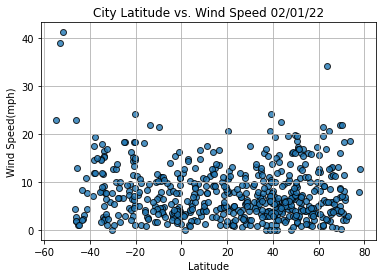

In [33]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "  + time.strftime("%x"))
plt.ylabel("Wind Speed(mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()